In [0]:
%matplotlib inline
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torch import autograd
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [0]:
class FashionMNIST(Dataset):
   def __init__(self, transform=None):
       self.transform = transform
       fashion_df = pd.read_csv('/content/fashion-mnist_train.csv')
       self.labels = fashion_df.label.values
       self.images = fashion_df.iloc[:, 1:].values.astype('uint8').reshape(-1, 28, 28)
   def __len__(self):
       return len(self.images)
   def __getitem__(self, idx):
       label = self.labels[idx]
       img = Image.fromarray(self.images[idx])
       if self.transform:
           img = self.transform(img)
       return img, label

In [0]:
dataset = FashionMNIST()
dataset[0][0]

In [0]:
import torchvision
# Image processing
transform = transforms.Compose([
               transforms.ToTensor(),
               transforms.Normalize(mean=(0.5, 0.5, 0.5),   # 3 for RGB channels
                                    std=(0.5, 0.5, 0.5))])
# MNIST dataset
fmnist = torchvision.datasets.FashionMNIST(root='../../data/',
                                  train=True,
                                  transform=transform,
                                  download=True)
# Data loader
data_loader = torch.utils.data.DataLoader(dataset=fmnist,
                                         batch_size=64,
                                         shuffle=True)

In [0]:
transform = transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,),(0.5,))])
dataset = FashionMNIST(transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [0]:
class Discriminator(nn.Module):
   def __init__(self):
       super().__init__()
       self.label_emb = nn.Embedding(10, 10)
       self.model = nn.Sequential(
           nn.Linear(794, 1024),
           nn.LeakyReLU(0.2, inplace=True),
           nn.Dropout(0.3),
           nn.Linear(1024, 512),
           nn.LeakyReLU(0.2, inplace=True),
           nn.Dropout(0.3),
           nn.Linear(512, 256),
           nn.LeakyReLU(0.2, inplace=True),
           nn.Dropout(0.3),
           nn.Linear(256, 1),
           nn.Sigmoid()
       )
   def forward(self, x, labels):
       x = x.view(x.size(0), 784)
       c = self.label_emb(labels)
       x = torch.cat([x, c], 1)
       out = self.model(x)
       return out.squeeze()


In [0]:
class Generator(nn.Module):
   def __init__(self):
       super().__init__()
       self.label_emb = nn.Embedding(10, 10)
       self.model = nn.Sequential(
           nn.Linear(110, 256),
           nn.LeakyReLU(0.2, inplace=True),
           nn.Linear(256, 512),
           nn.LeakyReLU(0.2, inplace=True),
           nn.Linear(512, 1024),
           nn.LeakyReLU(0.2, inplace=True),
           nn.Linear(1024, 784),
           nn.Tanh()
       )
   def forward(self, z, labels):
       z = z.view(z.size(0), 100)
       c = self.label_emb(labels)
       x = torch.cat([z, c], 1)
       out = self.model(x)
       return out.view(x.size(0), 28, 28)

In [0]:
generator = Generator().cuda()
discriminator = Discriminator().cuda()

In [0]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=1e-4)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=1e-4)

Starting epoch 0...
g_loss: 3.8319344520568848, d_loss: 0.10035426914691925


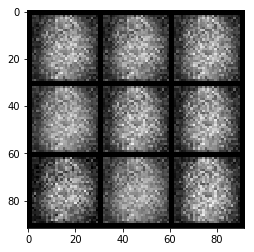

Starting epoch 1...
g_loss: 4.485162734985352, d_loss: 0.4042378067970276
Starting epoch 2...
g_loss: 4.572860240936279, d_loss: 0.2634147107601166
Starting epoch 3...
g_loss: 3.2151331901550293, d_loss: 0.31067705154418945
Starting epoch 4...
g_loss: 2.985625743865967, d_loss: 0.4547729790210724
Starting epoch 5...
g_loss: 2.3566417694091797, d_loss: 0.5491021871566772
Starting epoch 6...
g_loss: 2.0984396934509277, d_loss: 1.0070581436157227
Starting epoch 7...
g_loss: 2.1175336837768555, d_loss: 0.7629601955413818
Starting epoch 8...
g_loss: 2.19925594329834, d_loss: 0.6870461702346802
Starting epoch 9...
g_loss: 2.031526565551758, d_loss: 0.6069138050079346
Starting epoch 10...
g_loss: 2.09981107711792, d_loss: 0.6060466170310974


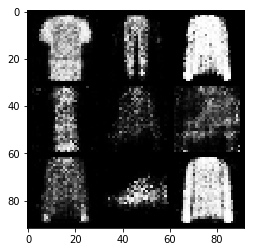

Starting epoch 11...
g_loss: 1.5913329124450684, d_loss: 0.6652746796607971
Starting epoch 12...
g_loss: 1.8265480995178223, d_loss: 0.7420284152030945
Starting epoch 13...
g_loss: 1.636745810508728, d_loss: 1.1038851737976074
Starting epoch 14...
g_loss: 1.7084975242614746, d_loss: 0.8015512824058533
Starting epoch 15...
g_loss: 1.659127950668335, d_loss: 0.8540475368499756
Starting epoch 16...
g_loss: 1.4640064239501953, d_loss: 1.0324679613113403
Starting epoch 17...
g_loss: 1.428865909576416, d_loss: 0.9476622343063354
Starting epoch 18...
g_loss: 1.37337327003479, d_loss: 1.1182849407196045
Starting epoch 19...
g_loss: 1.2906218767166138, d_loss: 0.9355453848838806
Starting epoch 20...
g_loss: 1.4574060440063477, d_loss: 0.8521325588226318


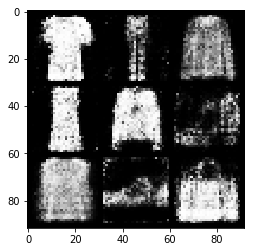

Starting epoch 21...
g_loss: 1.7126057147979736, d_loss: 0.9867572784423828
Starting epoch 22...
g_loss: 1.5291266441345215, d_loss: 1.3841633796691895
Starting epoch 23...
g_loss: 1.4326567649841309, d_loss: 0.9230299592018127
Starting epoch 24...
g_loss: 1.301423192024231, d_loss: 1.0059744119644165
Starting epoch 25...
g_loss: 1.267727017402649, d_loss: 0.8820818066596985
Starting epoch 26...
g_loss: 1.2189362049102783, d_loss: 0.9413695335388184
Starting epoch 27...
g_loss: 1.0019584894180298, d_loss: 1.0014913082122803
Starting epoch 28...
g_loss: 1.0136951208114624, d_loss: 1.1232471466064453
Starting epoch 29...
g_loss: 1.1945760250091553, d_loss: 1.0579397678375244
Starting epoch 30...
g_loss: 1.0230367183685303, d_loss: 1.097852349281311


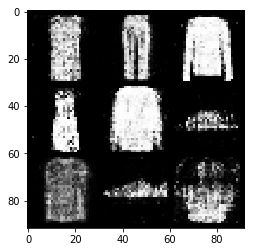

Starting epoch 31...
g_loss: 1.1217231750488281, d_loss: 1.0423728227615356
Starting epoch 32...
g_loss: 0.9290748834609985, d_loss: 0.9755708575248718
Starting epoch 33...
g_loss: 1.1811244487762451, d_loss: 1.1112183332443237
Starting epoch 34...
g_loss: 0.856890857219696, d_loss: 1.2050676345825195
Starting epoch 35...
g_loss: 1.0043046474456787, d_loss: 1.1901960372924805
Starting epoch 36...
g_loss: 1.006676435470581, d_loss: 1.0597052574157715
Starting epoch 37...
g_loss: 0.8943042755126953, d_loss: 1.2992157936096191
Starting epoch 38...
g_loss: 0.9792976379394531, d_loss: 1.143751859664917
Starting epoch 39...
g_loss: 0.9121982455253601, d_loss: 1.0421836376190186
Starting epoch 40...
g_loss: 0.976378858089447, d_loss: 1.2094972133636475


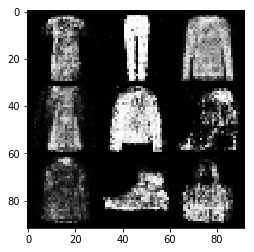

Starting epoch 41...
g_loss: 1.1542689800262451, d_loss: 1.2155942916870117
Starting epoch 42...
g_loss: 0.8946953415870667, d_loss: 1.3539694547653198
Starting epoch 43...
g_loss: 0.9902147054672241, d_loss: 1.1614372730255127
Starting epoch 44...
g_loss: 0.9499210119247437, d_loss: 1.151705265045166
Starting epoch 45...
g_loss: 1.0512323379516602, d_loss: 1.1706844568252563
Starting epoch 46...
g_loss: 0.7950258255004883, d_loss: 1.1966285705566406
Starting epoch 47...
g_loss: 0.9679157137870789, d_loss: 1.2622885704040527
Starting epoch 48...
g_loss: 1.044884443283081, d_loss: 1.2230229377746582
Starting epoch 49...
g_loss: 0.9642419815063477, d_loss: 1.135404109954834
Starting epoch 50...
g_loss: 0.927410900592804, d_loss: 1.298957109451294


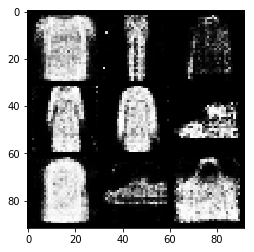

Starting epoch 51...
g_loss: 0.8917705416679382, d_loss: 1.3378026485443115
Starting epoch 52...
g_loss: 0.8566412925720215, d_loss: 1.178810715675354
Starting epoch 53...
g_loss: 0.9594249725341797, d_loss: 1.079909324645996
Starting epoch 54...
g_loss: 1.009413480758667, d_loss: 1.2688934803009033
Starting epoch 55...
g_loss: 0.8531515598297119, d_loss: 1.2206655740737915
Starting epoch 56...
g_loss: 0.946495532989502, d_loss: 1.3724141120910645
Starting epoch 57...
g_loss: 0.9079378843307495, d_loss: 1.2510936260223389
Starting epoch 58...
g_loss: 0.8382532596588135, d_loss: 1.1920604705810547
Starting epoch 59...
g_loss: 0.8581390380859375, d_loss: 1.3082307577133179
Starting epoch 60...
g_loss: 0.8765588402748108, d_loss: 1.3392078876495361


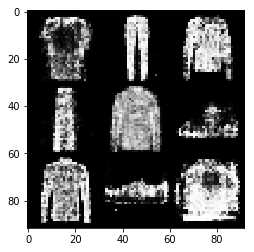

Starting epoch 61...
g_loss: 0.8331940174102783, d_loss: 1.1209264993667603
Starting epoch 62...
g_loss: 0.8729410171508789, d_loss: 1.1226158142089844
Starting epoch 63...
g_loss: 0.8833575248718262, d_loss: 1.1659821271896362
Starting epoch 64...
g_loss: 0.8831108212471008, d_loss: 1.1857551336288452
Starting epoch 65...
g_loss: 0.8751047849655151, d_loss: 1.2770689725875854
Starting epoch 66...
g_loss: 0.8744773268699646, d_loss: 1.3215789794921875
Starting epoch 67...
g_loss: 0.9086014032363892, d_loss: 1.202584981918335
Starting epoch 68...
g_loss: 0.9113225340843201, d_loss: 1.1871528625488281
Starting epoch 69...
g_loss: 0.8239762783050537, d_loss: 1.1931278705596924
Starting epoch 70...
g_loss: 0.8684482574462891, d_loss: 1.2989723682403564


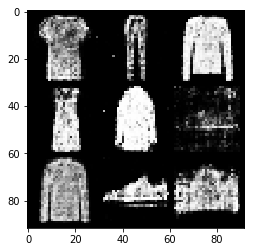

Starting epoch 71...
g_loss: 0.7782281637191772, d_loss: 1.2182036638259888
Starting epoch 72...
g_loss: 0.8037193417549133, d_loss: 1.1838369369506836
Starting epoch 73...
g_loss: 0.8498870134353638, d_loss: 1.3724746704101562
Starting epoch 74...
g_loss: 0.8438008427619934, d_loss: 1.3091685771942139
Starting epoch 75...
g_loss: 0.9428173303604126, d_loss: 1.3313722610473633
Starting epoch 76...
g_loss: 0.7945181727409363, d_loss: 1.2737560272216797
Starting epoch 77...
g_loss: 0.8617250919342041, d_loss: 1.3406822681427002
Starting epoch 78...
g_loss: 0.8661678433418274, d_loss: 1.2365409135818481
Starting epoch 79...
g_loss: 0.9231182932853699, d_loss: 1.180408239364624
Starting epoch 80...
g_loss: 0.8760619163513184, d_loss: 1.3388583660125732


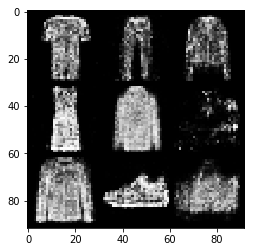

Starting epoch 81...
g_loss: 0.8724932670593262, d_loss: 1.408740758895874
Starting epoch 82...
g_loss: 0.7937832474708557, d_loss: 1.1160197257995605
Starting epoch 83...
g_loss: 0.8516337871551514, d_loss: 1.277280569076538
Starting epoch 84...
g_loss: 0.8469927310943604, d_loss: 1.4078760147094727
Starting epoch 85...
g_loss: 0.9263216257095337, d_loss: 1.2752691507339478
Starting epoch 86...
g_loss: 0.8879102468490601, d_loss: 1.2693241834640503
Starting epoch 87...
g_loss: 0.9070170521736145, d_loss: 1.1625449657440186
Starting epoch 88...
g_loss: 0.7187188267707825, d_loss: 1.2424954175949097
Starting epoch 89...
g_loss: 0.7190366983413696, d_loss: 1.4543986320495605
Starting epoch 90...
g_loss: 0.6983476281166077, d_loss: 1.3861281871795654


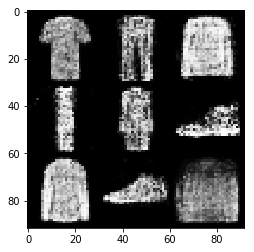

Starting epoch 91...
g_loss: 0.7089173793792725, d_loss: 1.306586742401123
Starting epoch 92...
g_loss: 0.7894353866577148, d_loss: 1.2392842769622803
Starting epoch 93...
g_loss: 0.7441409826278687, d_loss: 1.2840255498886108
Starting epoch 94...
g_loss: 0.7756361961364746, d_loss: 1.3866651058197021
Starting epoch 95...
g_loss: 0.8163871765136719, d_loss: 1.3845467567443848
Starting epoch 96...
g_loss: 0.8199493885040283, d_loss: 1.288651943206787
Starting epoch 97...
g_loss: 0.9078137874603271, d_loss: 1.3319529294967651
Starting epoch 98...
g_loss: 0.7779414653778076, d_loss: 1.4787673950195312
Starting epoch 99...
g_loss: 0.8661750555038452, d_loss: 1.2233953475952148


In [0]:
def generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion):
   g_optimizer.zero_grad()
   z = Variable(torch.randn(batch_size, 100)).cuda()
   fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size))).cuda()
   fake_images = generator(z, fake_labels)
   validity = discriminator(fake_images, fake_labels)
   g_loss = criterion(validity, Variable(torch.ones(batch_size)).cuda())
   g_loss.backward()
   g_optimizer.step()
   return g_loss.item()
def discriminator_train_step(batch_size, discriminator, generator, d_optimizer, criterion, real_images, labels):
   d_optimizer.zero_grad()
   # train with real images
   real_validity = discriminator(real_images, labels)
   real_loss = criterion(real_validity, Variable(torch.ones(batch_size)).cuda())
   # train with fake images
   z = Variable(torch.randn(batch_size, 100)).cuda()
   fake_labels = Variable(torch.LongTensor(np.random.randint(0, 10, batch_size))).cuda()
   fake_images = generator(z, fake_labels)
   fake_validity = discriminator(fake_images, fake_labels)
   fake_loss = criterion(fake_validity, Variable(torch.zeros(batch_size)).cuda())
   d_loss = real_loss + fake_loss
   d_loss.backward()
   d_optimizer.step()
   return d_loss.item()
num_epochs = 100
n_critic = 5
for epoch in range(num_epochs):
   print('Starting epoch {}...'.format(epoch))
   for i, (images, labels) in enumerate(data_loader):
       real_images = Variable(images).cuda()
       labels = Variable(labels).cuda()
       generator.train()
       batch_size = real_images.size(0)
       d_loss = discriminator_train_step(len(real_images), discriminator,
                                         generator, d_optimizer, criterion,
                                         real_images, labels)
       g_loss = generator_train_step(batch_size, discriminator, generator, g_optimizer, criterion)
   generator.eval()
   print('g_loss: {}, d_loss: {}'.format(g_loss, d_loss))
   if (epoch%10) == 0:
       z = Variable(torch.randn(9, 100)).cuda()
       labels = Variable(torch.LongTensor(np.arange(9))).cuda()
       sample_images = generator(z, labels).unsqueeze(1).data.cpu()
       grid = make_grid(sample_images, nrow=3, normalize=True).permute(1,2,0).numpy()
       plt.imshow(grid)
       plt.show()


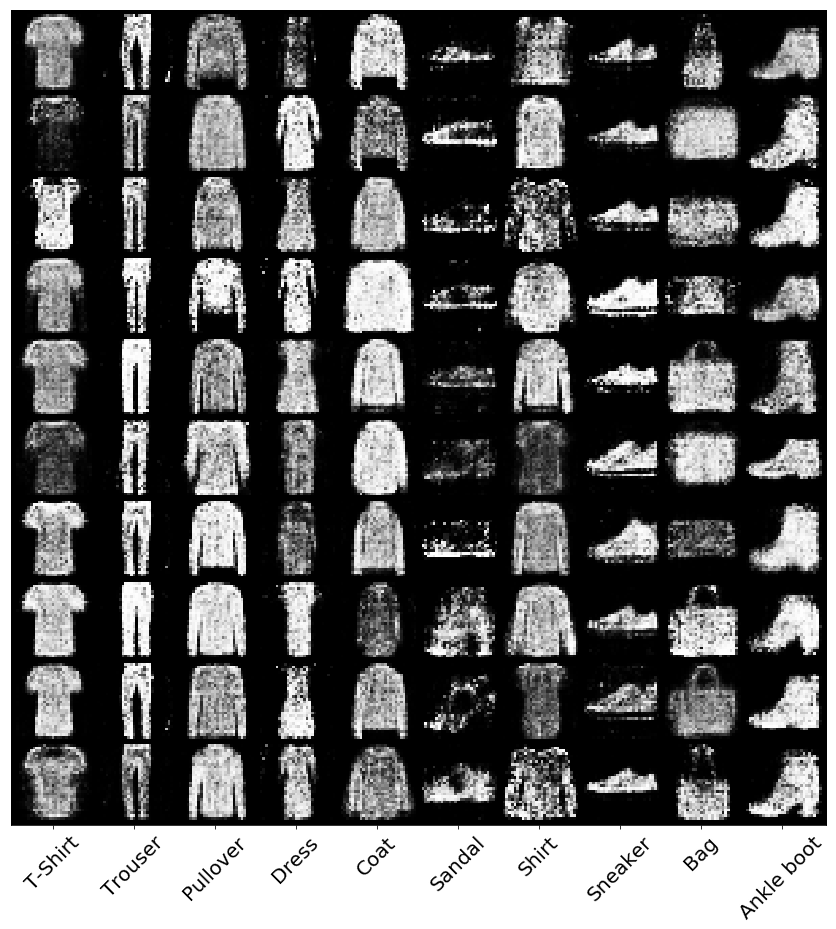

In [0]:
z = Variable(torch.randn(100, 100)).cuda()
labels = Variable(torch.LongTensor([i for _ in range(10) for i in range(10)])).cuda()
sample_images = generator(z, labels).unsqueeze(1).data.cpu()
grid = make_grid(sample_images, nrow=10, normalize=True).permute(1,2,0).numpy()
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(grid)
_ = plt.yticks([])
_ = plt.xticks(np.arange(15, 300, 30), ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45, fontsize=20)